In [1]:
import keras,os
from keras.datasets import fashion_mnist, cifar100
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.models import Sequential
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from keras import optimizers 
from keras.layers.core import Lambda 
from keras import backend as K 
from tensorflow.keras.preprocessing import image
from matplotlib import pyplot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [2]:
from keras import regularizers
from sklearn import datasets # load dataset
from sklearn.model_selection import train_test_split # split dataset
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.metrics import accuracy_score # check accuracy
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from keras.callbacks import EarlyStopping

In [3]:
import keras,os
from keras.datasets import fashion_mnist, cifar100
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.models import Sequential
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from keras import optimizers
from keras.layers.core import Lambda
from keras import backend as K
from keras import regularizers
from sklearn import datasets # load dataset
from sklearn.model_selection import train_test_split # split dataset
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.metrics import accuracy_score # check accuracy
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Import the libraries
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/crack.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/crack.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/crack/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/crack/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 32000 files belonging to 2 classes.
Found 8000 files belonging to 2 classes.


In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_dir = '/content/crack/train'
val_dir = '/content/crack/test'

In [9]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

Found 32000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.


CNN

In [10]:
# Define the model architecture
modelcnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [11]:
modelcnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [12]:
modelcnn.compile(loss='binary_crossentropy', metrics=['accuracy'])
history = modelcnn.fit(
    train_generator,
    steps_per_epoch=20000//500,
    epochs=30,
    validation_data=val_generator,
    validation_steps=20000//500
)

Epoch 1/30
40/40 [==============================] - 19s 148ms/step - loss: 1.3403 - accuracy: 0.5172 - val_loss: 0.6977 - val_accuracy: 0.4891
Epoch 2/30
40/40 [==============================] - 8s 205ms/step - loss: 0.7437 - accuracy: 0.6695 - val_loss: 0.5744 - val_accuracy: 0.8687
Epoch 3/30
40/40 [==============================] - 6s 138ms/step - loss: 0.3416 - accuracy: 0.8695 - val_loss: 0.9186 - val_accuracy: 0.6438
Epoch 4/30
40/40 [==============================] - 7s 166ms/step - loss: 0.2604 - accuracy: 0.9203 - val_loss: 0.1294 - val_accuracy: 0.9641
Epoch 5/30
40/40 [==============================] - 6s 140ms/step - loss: 0.2291 - accuracy: 0.9172 - val_loss: 0.1059 - val_accuracy: 0.9703
Epoch 6/30
40/40 [==============================] - 8s 206ms/step - loss: 0.1369 - accuracy: 0.9672 - val_loss: 0.1050 - val_accuracy: 0.9711
Epoch 7/30
40/40 [==============================] - 6s 138ms/step - loss: 0.1290 - accuracy: 0.9547 - val_loss: 0.1557 - val_accuracy: 0.9469
Epoch

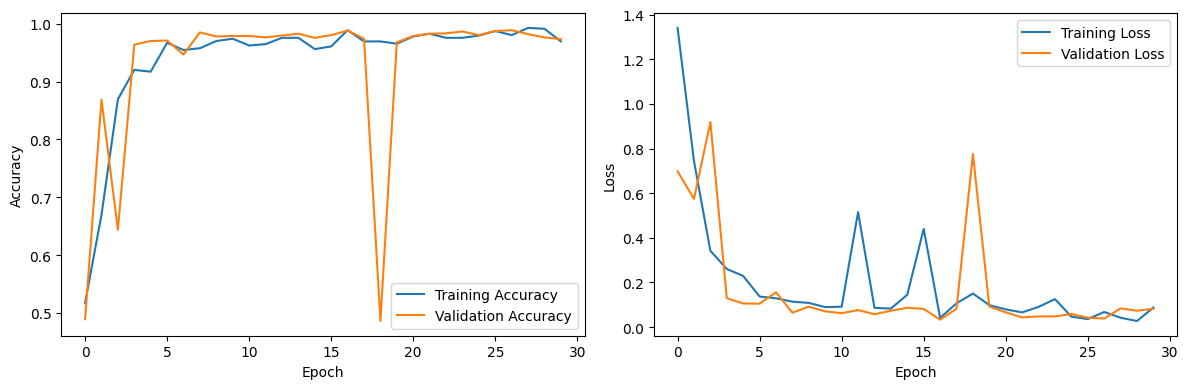

In [15]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [16]:
modelcnn.save('/content/crack/cnnfinal.h5')